In [52]:
file_path <- "/home/jupyter/pp1/voterdata.csv"

In [53]:
data <- read.csv(file_path)

In [54]:
print(data)

                EVENT_NAME EVENT_YEAR ED_ABBREVIATION
1    2005 General Election       2005             ABC
2    2005 General Election       2005             ABC
3    2005 General Election       2005             ABC
4    2005 General Election       2005             ABC
5    2005 General Election       2005             ABC
6    2005 General Election       2005             ABC
7    2005 General Election       2005             ABC
8    2005 General Election       2005             ABM
9    2005 General Election       2005             ABM
10   2005 General Election       2005             ABM
11   2005 General Election       2005             ABM
12   2005 General Election       2005             ABM
13   2005 General Election       2005             ABM
14   2005 General Election       2005             ABM
15   2005 General Election       2005             ALQ
16   2005 General Election       2005             ALQ
17   2005 General Election       2005             ALQ
18   2005 General Election  

In [55]:
unique_age_groups <- unique(data$AGE_GROUP)
print(unique_age_groups)

[1] "18-24" "25-34" "35-44" "45-54" "55-64" "65-74" "75+"  


  AGE_GROUP VOTER_TURNOUT CLUSTER_LABEL TURNOUT_STATUS
1     18-24      48.57429             2            Low
2     25-34      41.85318             2            Low
3     35-44      50.68965             2            Low
4     45-54      58.58669             1           High
5     55-64      66.43501             1           High
6     65-74      73.45227             1           High
7       75+      64.68864             1           High


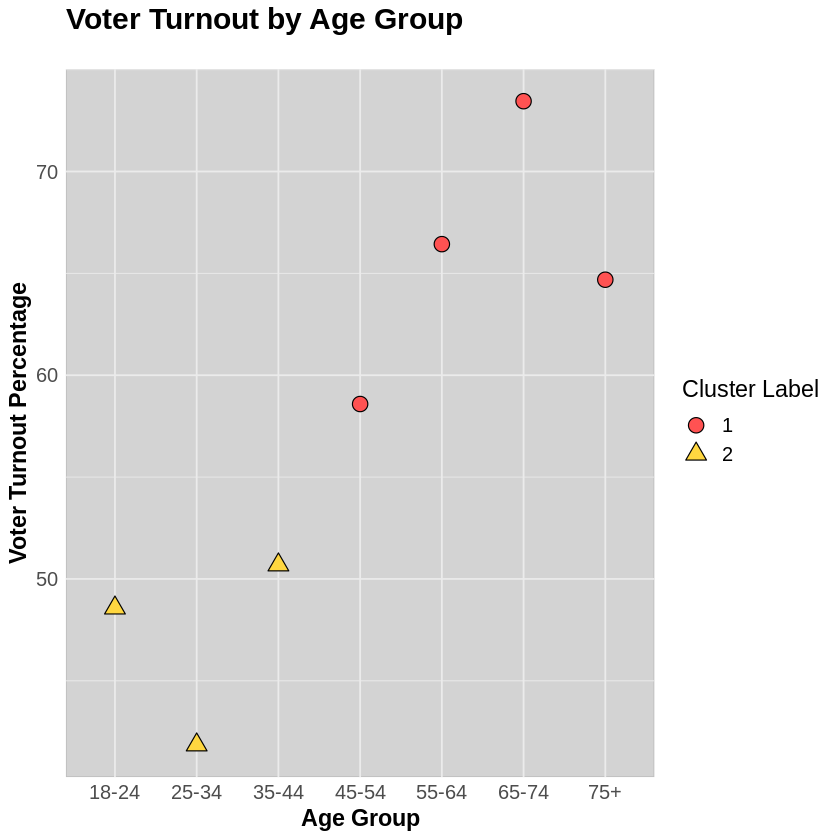

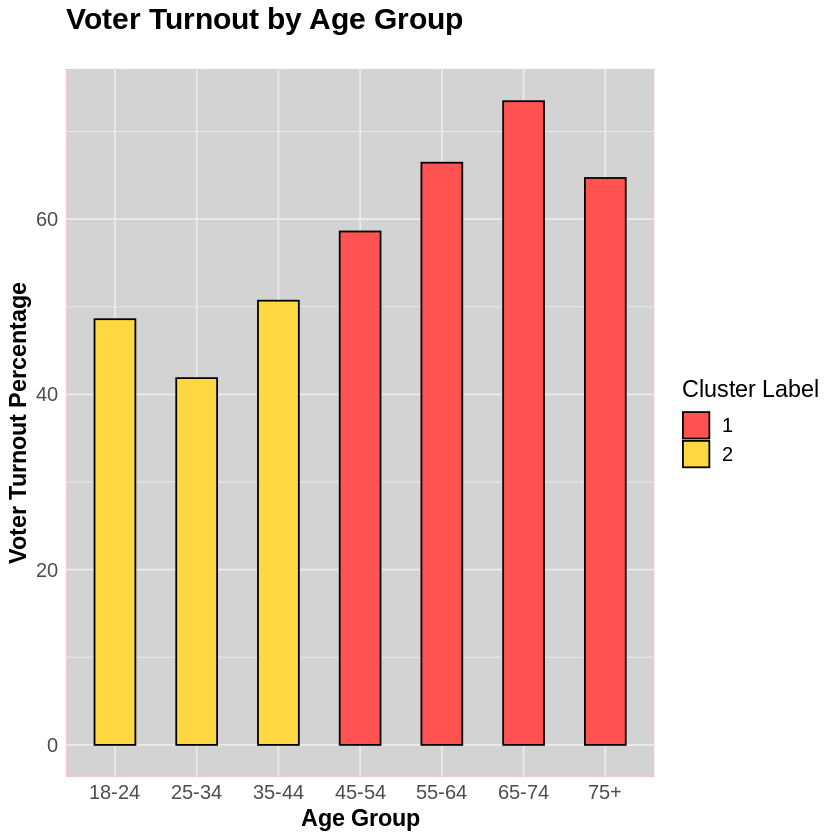

In [64]:
# Do younger people in British Columbia vote more or less than older people in BC? 


data$REGISTERED_VOTERS <- as.numeric(gsub(",", "", data$REGISTERED_VOTERS))
data$PARTICIPATION <- as.numeric(gsub(",", "", data$PARTICIPATION))

total_registered <- aggregate(REGISTERED_VOTERS ~ AGE_GROUP, data, sum, na.rm = TRUE)
total_votes <- aggregate(PARTICIPATION ~ AGE_GROUP, data, sum, na.rm = TRUE)

voter_turnout <- (total_votes$PARTICIPATION / total_registered$REGISTERED_VOTERS) * 100
age_group_turnout <- data.frame(AGE_GROUP = total_registered$AGE_GROUP, VOTER_TURNOUT = voter_turnout)

# clustering 
num_clusters <- 2  # Number of clusters to create

# k-means clustering
clustering_result <- kmeans(turnout_matrix, centers = num_clusters) 
age_group_turnout$CLUSTER_LABEL <- as.factor(clustering_result$cluster)
overall_turnout <- sum(total_votes$PARTICIPATION) / sum(total_registered$REGISTERED_VOTERS) * 100
age_group_turnout$TURNOUT_STATUS <- ifelse(age_group_turnout$VOTER_TURNOUT < overall_turnout, "Low", "High")
print(age_group_turnout)

# scatter plot
scatter_plot <- ggplot(age_group_turnout, aes(x = AGE_GROUP, y = VOTER_TURNOUT, fill = CLUSTER_LABEL, shape = CLUSTER_LABEL)) +
  geom_point(size = 4, color = "black") +
  labs(title = "Voter Turnout by Age Group",
       x = "Age Group",
       y = "Voter Turnout Percentage",
       fill = "Cluster Label",
       shape = "Cluster Label") +
  scale_fill_manual(values = c("#FF5252", "#FFD740", "#FF4081", "#40C4FF")) +
  scale_shape_manual(values = c(21, 24, 22, 23)) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold", margin = margin(b = 20)),
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 14, face = "bold"),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    legend.key = element_blank(),
    panel.background = element_rect(fill = "lightgray", color = "gray")
  )
print(scatter_plot)

# Bar chart
bar_chart <- ggplot(age_group_turnout, aes(x = AGE_GROUP, y = VOTER_TURNOUT, fill = CLUSTER_LABEL)) +
  geom_bar(stat = "identity", color = "black", width = 0.5) +
  labs(title = "Voter Turnout by Age Group",
       x = "Age Group",
       y = "Voter Turnout Percentage",
       fill = "Cluster Label") +
  scale_fill_manual(values = c("#FF5251", "#FFD740", "#FF4081", "#40C4FF")) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 18, face = "bold", margin = margin(b = 20)),
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 14, face = "bold"),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    panel.background = element_rect(fill = "lightgray", color = "pink")
  )
print(bar_chart)



In [12]:
install.packages("ggplot2")
library(ggplot2)


Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [51]:
total_participation <- sum(as.numeric(gsub(",", "", data$PARTICIPATION)))

total_registered_voters <- sum(as.numeric(gsub(",", "", data$REGISTERED_VOTERS)))
turnout_rate <- (total_participation / total_registered_voters) * 100

age_group_participation <- as.numeric(gsub(",", "", data$PARTICIPATION))
age_group_registered_voters <- as.numeric(gsub(",", "", data$REGISTERED_VOTERS))
age_group_turnout_rate <- (age_group_participation / age_group_registered_voters) * 100

highest_participation_age_group <- data$AGE_GROUP[which.max(age_group_participation)]
lowest_participation_age_group <- data$AGE_GROUP[which.min(age_group_participation)]

cat("Overall Participation:", total_participation, "\n")
cat("Overall Turnout Rate:", turnout_rate, "%\n")
cat("Highest Participation Age Group:", highest_participation_age_group, "\n")
cat("Lowest Participation Age Group:", lowest_participation_age_group, "\n")

age_group_turnout_df <- data.frame(Age_Group = data$AGE_GROUP, Turnout_Rate = age_group_turnout_rate)
print(age_group_turnout_df)


Overall Participation: 9124675 
Overall Turnout Rate: 57.79258 %
Highest Participation Age Group: 65-74 
Lowest Participation Age Group: 18-24 
     Age_Group Turnout_Rate
1        18-24     51.39885
2        25-34     42.67062
3        35-44     53.81795
4        45-54     63.03102
5        55-64     69.71260
6        65-74     76.74570
7          75+     66.23724
8        18-24     48.71324
9        25-34     42.38690
10       35-44     53.40560
11       45-54     62.37332
12       55-64     70.49402
13       65-74     74.23088
14         75+     61.28249
15       18-24     56.39229
16       25-34     46.69242
17       35-44     58.81128
18       45-54     70.58251
19       55-64     79.07713
20       65-74     84.18858
21         75+     71.60624
22       18-24     66.52921
23       25-34     57.23997
24       35-44     63.72247
25       45-54     72.46345
26       55-64     78.30739
27       65-74     78.14910
28         75+     67.13344
29       18-24     56.30896
30       25-34  

In [83]:
# How have the number of registered voters in British Columbia changed from 2005 to 2020?

data$REGISTERED_VOTERS <- as.numeric(gsub(",", "", data$REGISTERED_VOTERS))
data$EVENT_YEAR <- as.integer(data$EVENT_YEAR)
filtered_data <- data[data$EVENT_YEAR >= 2005 & data$EVENT_YEAR <= 2020, ]
voters_by_year <- aggregate(REGISTERED_VOTERS ~ EVENT_YEAR, data = filtered_data, sum)
voters_by_year <- voters_by_year[order(voters_by_year$EVENT_YEAR), ]
voters_by_year$Percentage_Change <- NA

for (i in 2:nrow(voters_by_year)) {
  voters_by_year$Percentage_Change[i] <- (voters_by_year$REGISTERED_VOTERS[i] - voters_by_year$REGISTERED_VOTERS[i-1]) / voters_by_year$REGISTERED_VOTERS[i-1] * 100
}

colnames(voters_by_year) <- c("Year", "Number of Voters", "Percentage Change")
print(voters_by_year)


  Year Number of Voters Percentage Change
1 2005          2845284                NA
2 2009          2995465          5.278243
3 2013          3176455          6.042134
4 2017          3246647          2.209759
5 2020          3524812          8.567762


In [18]:
# Can we predict the probability that an individual will vote, given only their age?

data <- read.csv("voterdata.csv")
data$PARTICIPATION <- as.numeric(gsub(",", "", data$PARTICIPATION))
data$REGISTERED_VOTERS <- as.numeric(gsub(",", "", data$REGISTERED_VOTERS))

#logistic regression
model <- glm(PARTICIPATION / REGISTERED_VOTERS ~ AGE_GROUP, data = data, family = binomial)
age_groups <- unique(data$AGE_GROUP)
new_data <- data.frame(AGE_GROUP = age_groups)
new_data$PROBABILITY <- predict(model, newdata = new_data, type = "response")

print(new_data)


Warning message in eval(family$initialize):
“non-integer #successes in a binomial glm!”


  AGE_GROUP PROBABILITY
1     18-24   0.4846159
2     25-34   0.4131245
3     35-44   0.5048073
4     45-54   0.5820999
5     55-64   0.6638240
6     65-74   0.7280806
7       75+   0.6382528


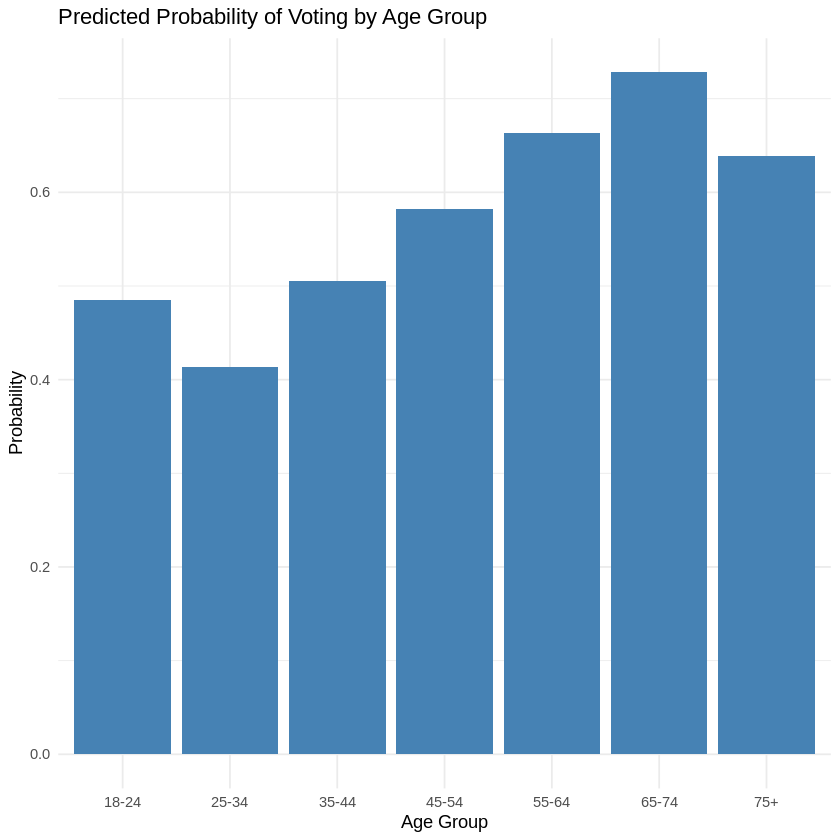

In [20]:
plot <- ggplot(new_data, aes(x = AGE_GROUP, y = PROBABILITY)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = "Predicted Probability of Voting by Age Group", x = "Age Group", y = "Probability") +
  theme_minimal()
print(plot)


In [3]:
# Did a bigger or smaller proportion of young people vote in 2020 compared to 2005? 

data <- read.csv("voterdata.csv")

data$REGISTERED_VOTERS <- as.numeric(gsub(",", "", data$REGISTERED_VOTERS))
data$PARTICIPATION <- as.numeric(gsub(",", "", data$PARTICIPATION))

In [4]:
data1 <- subset(data, AGE_GROUP == "18-24") 

In [5]:
data1 <- transform(data1, PROPORTION = PARTICIPATION / REGISTERED_VOTERS) 

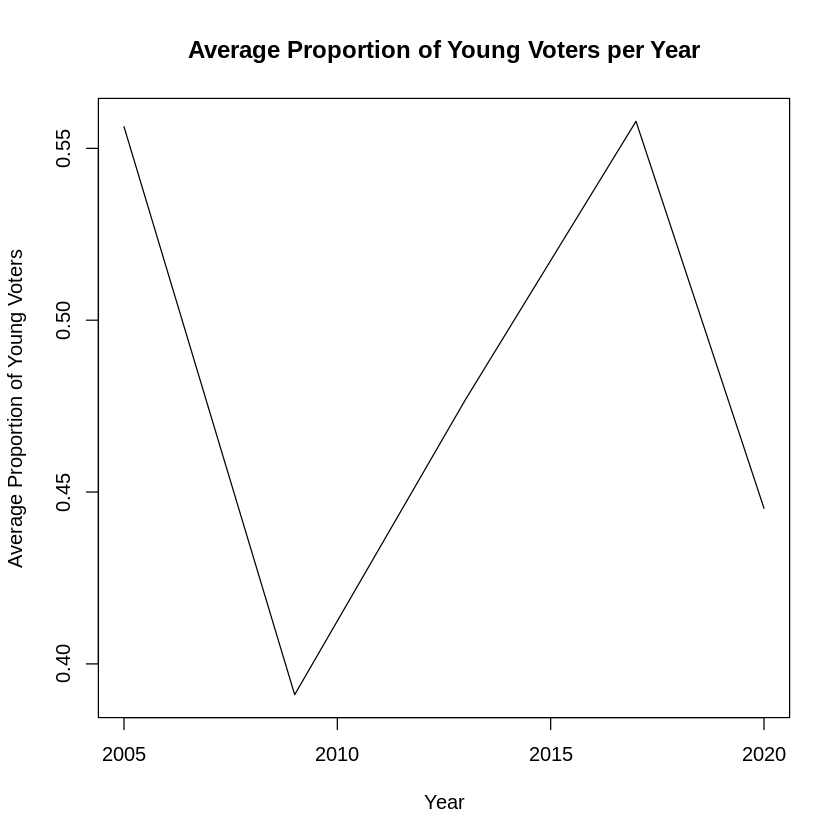

In [6]:
average <- aggregate(PROPORTION ~ EVENT_YEAR, data = data1, FUN = mean)

plot(average$EVENT_YEAR, average$PROPORTION, type = "l", 
     xlab = "Year", ylab = "Average Proportion of Young Voters", 
     main = "Average Proportion of Young Voters per Year")


Call:
lm(formula = PROPORTION ~ EVENT_YEAR, data = data1)

Coefficients:
(Intercept)   EVENT_YEAR  
  2.4777018   -0.0009901  


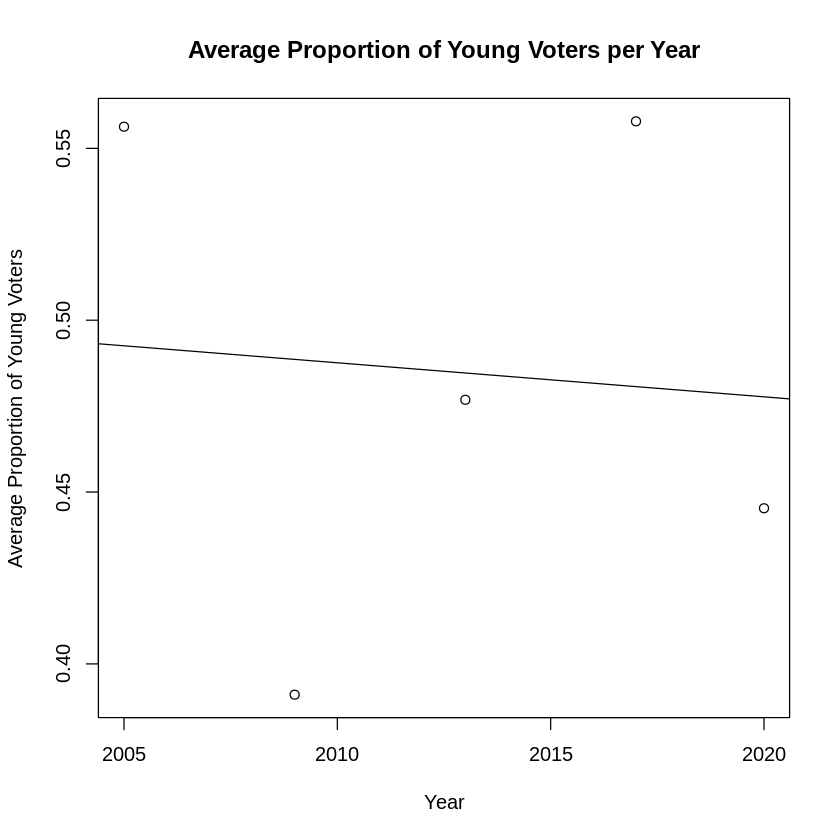

In [7]:
plot(average$EVENT_YEAR, average$PROPORTION, 
     xlab = "Year", ylab = "Average Proportion of Young Voters", 
     main = "Average Proportion of Young Voters per Year")
lm_model <- lm(PROPORTION ~ EVENT_YEAR, data = data1)
lm_model
abline(2.4777018,-0.0009901 )
abline()

In [8]:
data2 <- subset(data, AGE_GROUP == "45-54")
data2 <- transform(data2, PROPORTION = PARTICIPATION / REGISTERED_VOTERS)

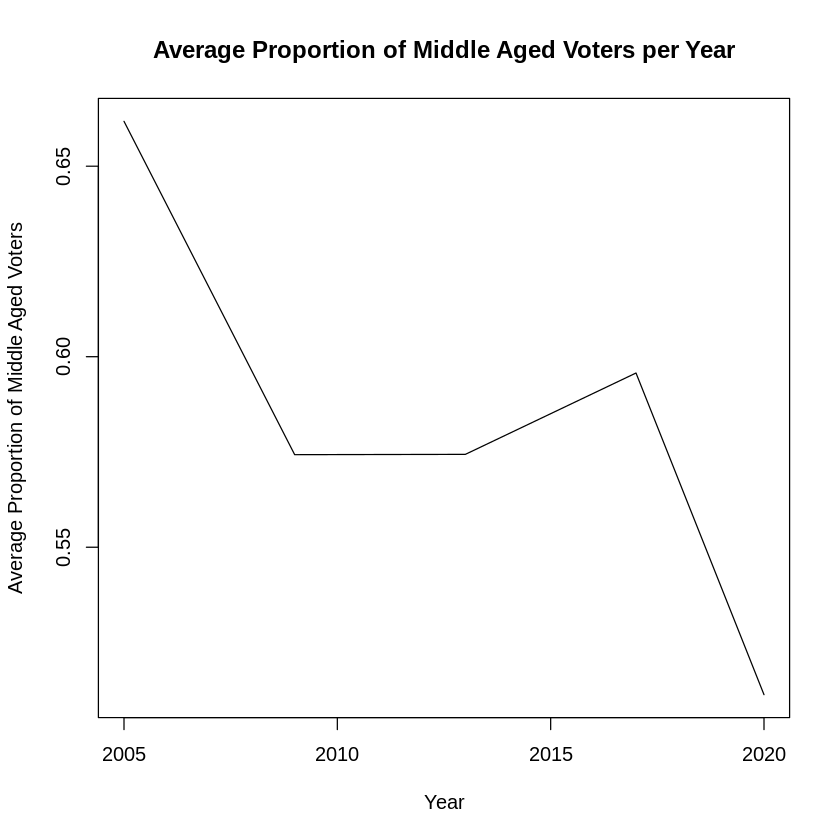

In [9]:
average <- aggregate(PROPORTION ~ EVENT_YEAR, data = data2, FUN = mean)

plot(average$EVENT_YEAR, average$PROPORTION, type = "l",
     xlab = "Year", ylab = "Average Proportion of Middle Aged Voters", 
     main = "Average Proportion of Middle Aged Voters per Year")


Call:
lm(formula = PROPORTION ~ EVENT_YEAR, data = data2)

Coefficients:
(Intercept)   EVENT_YEAR  
  14.936451    -0.007131  


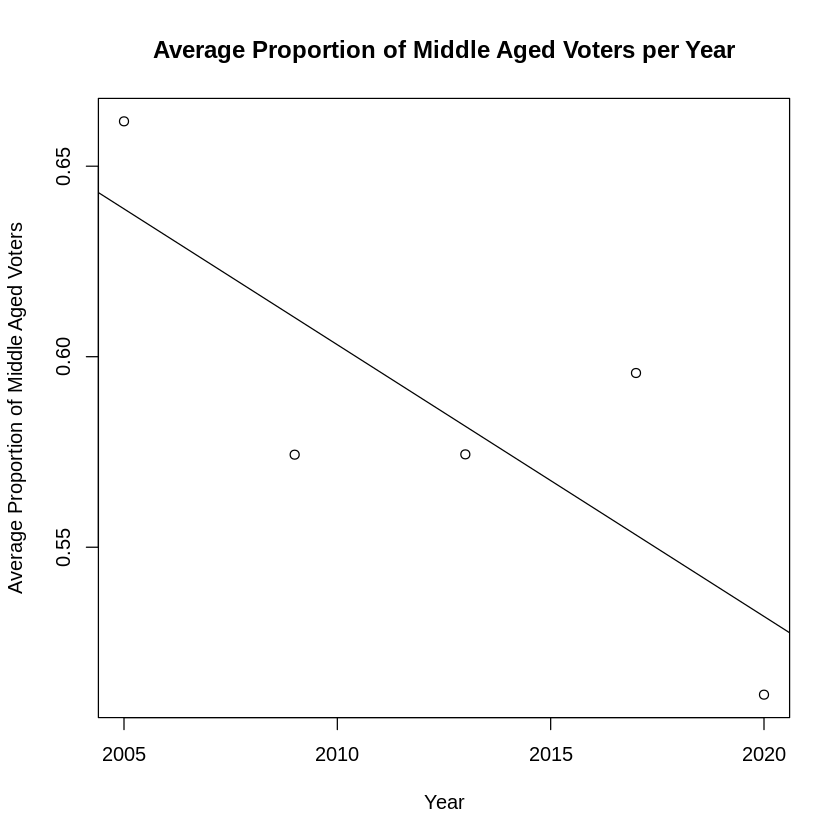

In [10]:
plot(average$EVENT_YEAR, average$PROPORTION, 
     xlab = "Year", ylab = "Average Proportion of Middle Aged Voters", 
     main = "Average Proportion of Middle Aged Voters per Year")
lm_model <- lm(PROPORTION ~ EVENT_YEAR, data = data2)
lm_model
abline(14.936451,-0.007131)
abline()